Installing Necessary Libraries

In [1]:
!pip install tensorflow numpy matplotlib

Import Necessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Load and Preprocess the Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)  # 10 classes in CIFAR-10
y_test = keras.utils.to_categorical(y_test, 10)

Define the CNN Architecture

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Compile the Model

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5413 - accuracy: 0.4372 - val_loss: 1.3126 - val_accuracy: 0.5279
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1794 - accuracy: 0.5835 - val_loss: 1.1145 - val_accuracy: 0.6039
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.0268 - accuracy: 0.6381 - val_loss: 1.0693 - val_accuracy: 0.6190
Epoch 4/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9306 - accuracy: 0.6739 - val_loss: 0.9334 - val_accuracy: 0.6743
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8562 - accuracy: 0.6995 - val_loss: 0.9387 - val_accuracy: 0.6703
Epoch 6/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8070 - accuracy: 0.7174 - val_loss: 0.8778 - val_accuracy: 0.6986
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7513 - accuracy: 0.7371 - val_loss: 0.8657 -

Evaluate the Model

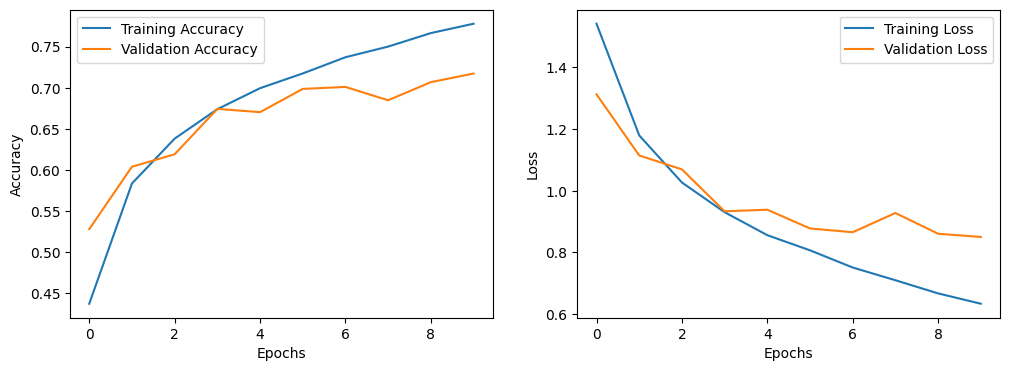

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Make Predictions

In [9]:
predictions = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


Save and Load the Model

In [10]:
model.save('image_classification_model.h5')
loaded_model = keras.models.load_model('image_classification_model.h5')